# IMPORTING LIBRARIES

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# LOADING MODEL

In [5]:
model = tf.keras.models.load_model('trained_model.keras')

In [6]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 63, 63, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 31, 31, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 31, 31, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │         769,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,616,288 (63.39 MB)

 Trainable params: 5,538,762 (21.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,077,526 (42.26 MB)

# VISUALIZING SINGLE IMAGE

In [11]:
import cv2

In [13]:
import matplotlib.image as mpimg

In [15]:
image_path = "C:\\Users\\admin\\OneDrive\\Desktop\\PROJECTS\\Plant Diseases Prediction Model\\test\\test\\AppleCedarRust1.JPG"

In [17]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #Convert BGR img to RGB

([], [])

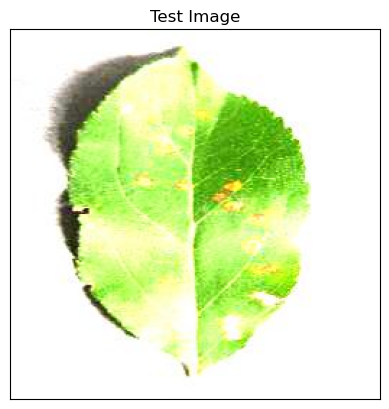

In [19]:
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])

# TESTING MODEL

In [23]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))

In [25]:
input_arr = tf.keras.preprocessing.image.img_to_array(image)

In [27]:
print(input_arr.shape)  #we wont be using this because this is a single image

(128, 128, 3)


In [30]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])     #we will use this because this will show single image in a batch
print(input_arr.shape)            #here the 1 represents the batch size, and we need a batch because we have trained aur model on batches

(1, 128, 128, 3)


In [33]:
predictions = model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


In [35]:
predictions

array([[1.42308736e-05, 2.13433242e-12, 9.99294877e-01, 1.56202509e-10,
        8.53944044e-08, 7.77031495e-11, 1.01109408e-14, 3.89499055e-09,
        2.69624194e-13, 1.48555626e-10, 2.97859204e-14, 9.24383325e-09,
        2.99687358e-10, 4.41754582e-06, 1.09315920e-07, 1.08036219e-10,
        5.34752763e-11, 2.10523808e-12, 2.58411181e-10, 3.70033781e-08,
        1.65826805e-06, 1.11911476e-07, 1.24764867e-07, 2.91101469e-06,
        6.43733927e-13, 7.45999973e-09, 4.75313900e-05, 8.72500960e-11,
        1.35515671e-04, 1.54020803e-04, 1.80619798e-04, 3.62550807e-08,
        1.83954053e-05, 1.32721482e-07, 9.12602263e-05, 8.30298319e-09,
        5.31589103e-05, 7.59692057e-07]], dtype=float32)

In [37]:
predictions.shape

(1, 38)

In [40]:
result_index = np.argmax(predictions)

In [42]:
result_index

2

In [44]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

# DISPLAYING RESULT

In [48]:
model_prediction = class_name[result_index]

In [50]:
model_prediction

'Apple___Cedar_apple_rust'

([], [])

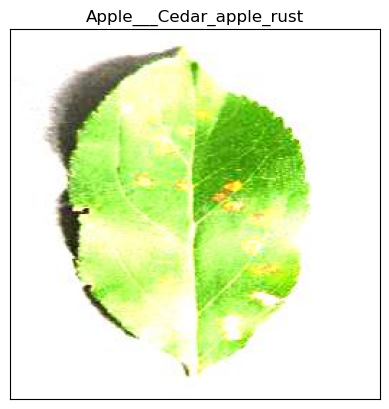

In [52]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(model_prediction)
plt.yticks([])
plt.xticks([])

# TAKING ANOTHER IMG FOR TESTING

(1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
The Image shown below is of  Apple___Apple_scab


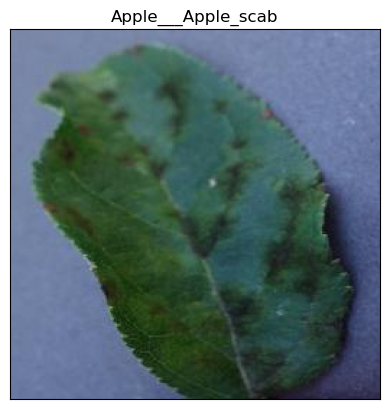

In [57]:
image_path = "C:\\Users\\admin\\OneDrive\\Desktop\\PROJECTS\\Plant Diseases Prediction Model\\test\\test\\AppleScab2.JPG"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])    
print(input_arr.shape)
predictions = model.predict(input_arr)
result_index = np.argmax(predictions)
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(model_prediction)
plt.yticks([])
plt.xticks([])
print("The Image shown below is of ",model_prediction)